In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Rubik'
actual_color    = '#30ab6d'
predicted_color = '#0b6b48'

df = pd.read_csv('lucf.csv')


df = df[(df['year'] >= 2008) & (df['year'] <= 2018)]


X = df[['tree_cover_loss', 'forest_area']]
y = df['lucf_emission']


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


importances = rf.feature_importances_
feature_names = ['tree_cover_loss', 'forest_area']
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


df['lucf_emission_pred'] = rf.predict(X)

tree_cover_loss: 0.9111
forest_area: 0.0889


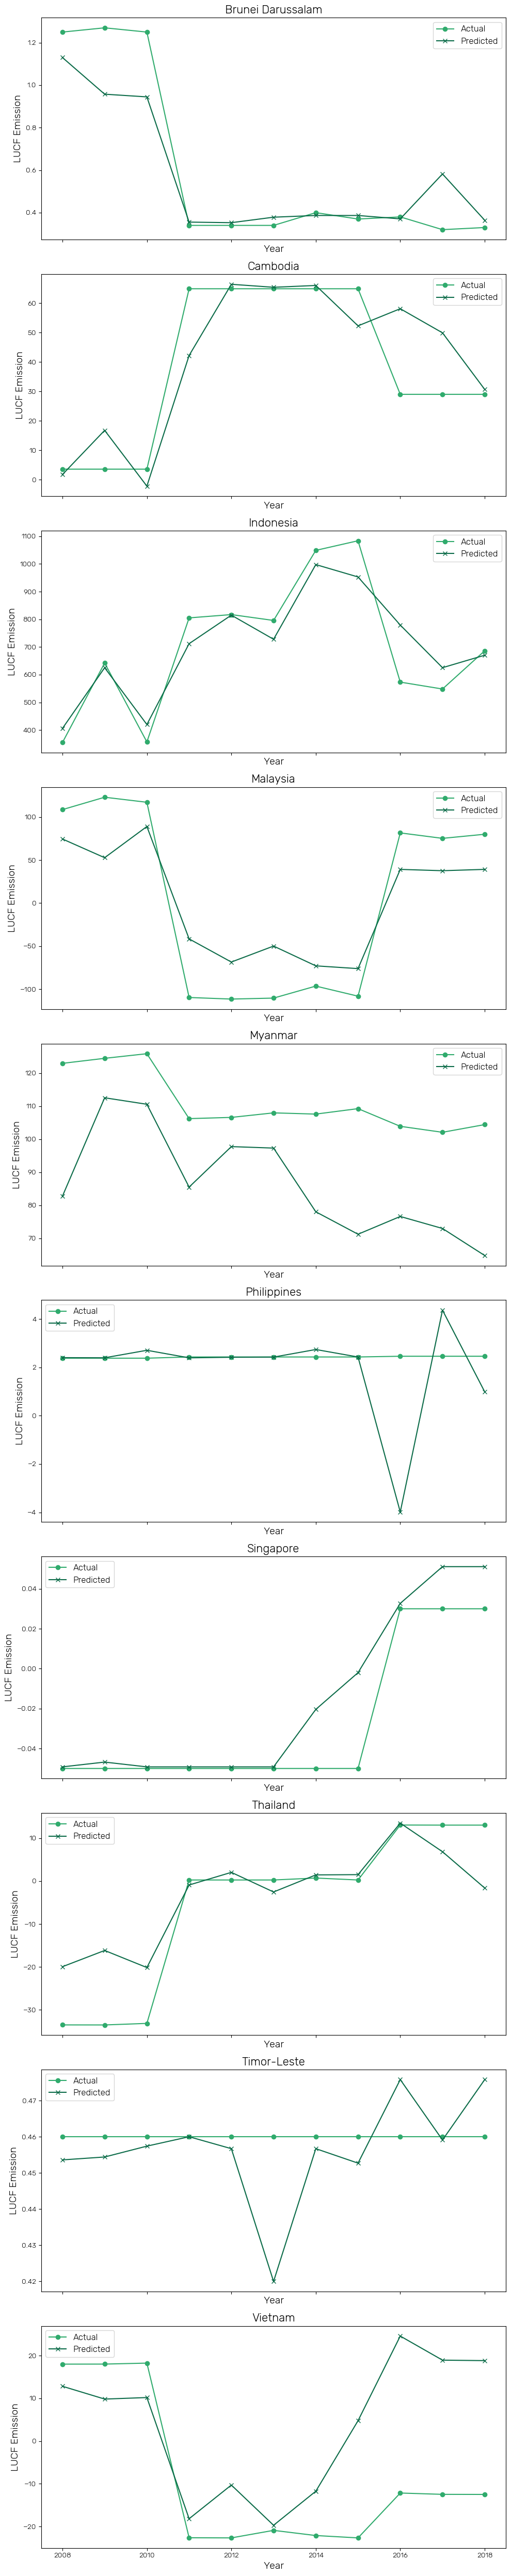

In [4]:
# Figures
countries = df['country'].unique()
num_countries = len(countries)
fig, axes = plt.subplots(num_countries, 1, figsize=(10, 5 * num_countries), sharex=True)
if num_countries == 1:
    axes = [axes]  

for ax, country in zip(axes, countries):
    country_df = df[df['country'] == country].sort_values('year')
    ax.plot(
        country_df['year'],
        country_df['lucf_emission'],
        label='Actual',
        marker='o',
        color=actual_color
    )
    ax.plot(
        country_df['year'],
        country_df['lucf_emission_pred'],
        label='Predicted',
        marker='x',
        color=predicted_color
    )
    ax.set_title(country, fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('LUCF Emission', fontsize=14)
    ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
# R-squared for each country
for country in countries:
    c_df = df[df['country'] == country]
    r2 = r2_score(c_df['lucf_emission'], c_df['lucf_emission_pred'])
    print(f"R-squared for {country}: {r2:.4f}")


R-squared for Brunei Darussalam: 0.8450
R-squared for Cambodia: 0.7066
R-squared for Indonesia: 0.8480
R-squared for Malaysia: 0.7989
R-squared for Myanmar: -9.3151
R-squared for Philippines: -4814.8879
R-squared for Singapore: 0.7070
R-squared for Thailand: 0.7393
R-squared for Timor-Leste: 0.0000
R-squared for Vietnam: -0.4520
